Introduction We will start with Generic Graph search. Graph Search is an algorithm where, given a graph, G(V, E), with a starting vertex s 
∈
 V, we identify all vertices of G reachable from s
The generic graph search algorithm does the following, with the input grapg G = (V, E) and start vertex s

    mark s as explored and all other vertices as unexplored

    while there is an edge (v, w) in E where v is explored and w is not explored:
        mark w as explored 

***

The above algorithm is very abstract and the strategy to pick the edge is not specified. In the above algorithm, the vertex v is in the frontier and we wish to find all edges with one vertex in frontier and other outside. Two strategies that we can look at are
- For all vertices in the frontier, explore all edges that go from them to vertices outside the frontier
- Another strategy would be
    - Pick one vertex in the frontier
    - Pick one edge from the this vertex to another vertex not in frontier
    - Add this another vertex to the frontier and aggressively keep adding the vertices in the frontier before looking at another vertex, unlike the first strategy
These two approches are BFS(Breadth First Search) and DFS (Depth First Search) algorothms for graph exploration. While they both work for finding all possible vertices reachable from a starting vertex s in time 
θ(m+n), for some use cases we choose one over another.
For example, for computing the shortst distance to a vertex from a starting vertex s can be done only using BFS efficiently. Where as some use cases like finding strongly connected components in case of directed graphs, we need DFS.


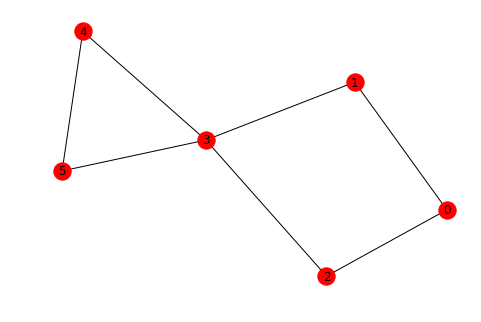

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

A = np.matrix([
   [0, 1, 1, 0, 0, 0],
   [1, 0, 0, 1, 0, 0],
   [1, 0, 0, 1, 0, 0],
   [0, 1, 1, 0, 1, 1],
   [0, 0, 0, 1, 0, 1],
   [0, 0, 0, 1, 1, 0],
])

G = nx.from_numpy_matrix(A)
nx.draw(G, with_labels = True)


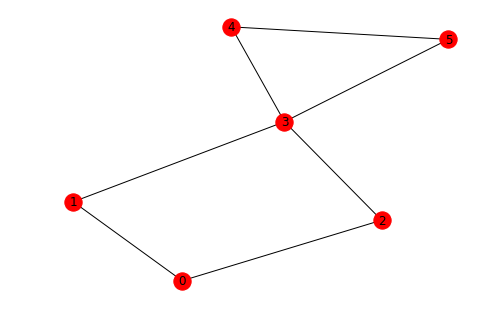

In [3]:
G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)

Consider the above graph, starting from vertex 0 which is at level 0, vertices 1 and 2 are at level 1, vertex 3 at level 2 and vertices 4 and 5 at level 3.
<br>BFS will discover these edges in this very order.<br>
Following Python code makes use of queues and implements BFS and also give is the level of each of the vertex from a provided starting vertex. We saw how addacency lists can be defined in Python in previous notebook, to avoid copying over the code, we will make use of the graph defined in above cell from python package networkx version 2.2 to get adjacent edges of a given vertex.



In [8]:
adjacency_dict = {v: [e for e in ae] for v, ae in G.adjacency()}
adjacency_dict

{0: [1, 2], 1: [0, 3], 2: [0, 3], 3: [1, 2, 4, 5], 4: [3, 5], 5: [3, 4]}

If we look at the above dictionary, the key of the dictionary is the vertex and the value is the list of edges connected to it. With this dictionary, let us use bfs to find the level of vertices starting with vertex 0 as the starting vertex and see of we get the levels we expect.